In [19]:
# !pip install kiwi
# !pip install kiwipiepy
# !pip install pandas scikit-learn matplotlib wordcloud konlpy
# !pip install kiwi-python
# !pip install kiwi-kr

ERROR: Could not find a version that satisfies the requirement kiwi-kr (from versions: none)
ERROR: No matching distribution found for kiwi-kr


In [15]:
import json

with open('무기.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [3]:
import json
from kiwipiepy import Kiwi

# 1. JSON 파일 불러오기
with open('무기.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 2. Kiwi 초기화
kiwi = Kiwi()

# 3. 예시: 용례리스트 전체에서 명사만 추출
for entry in data:
    term = entry.get("용어")
    examples = entry.get("용례리스트", [])
    
    print(f"🔸 용어: {term}")
    for sentence in examples:
        tokens = kiwi.analyze(sentence)[0][0]  # 첫 번째 분석 결과에서 토큰만
        nouns = [token.form for token in tokens if token.tag.startswith("N")]  # 명사만 추출
        print(" - 형태소(명사):", nouns)


🔸 용어: 45형 데어링급 구축함
 - 형태소(명사): ['데어링', '급', '구축함', '애초', '척', '건조', '예정', '국방', '예산', '삭감', '척']
 - 형태소(명사): ['데어링', '급', '구축함', '향후', '년', '간', '영국', '해군', '주력', '전투', '함', '운용', '예정']
 - 형태소(명사): ['데어링', '급', '구축함', '대', '함', '미사일', '생존', '향상', '선체', '전체', '광범위', '스텔스', '설계', '적용']
 - 형태소(명사): ['통합', '전기', '추진', '방식', '사용', '데어링', '급', '구축함', '초', '만', '시속', '해당', '노트', '속도', '도달', '수']
 - 형태소(명사): ['데어링', '급', '구축함', '특징', '통합', '전기', '추진', '방식', '채용', '전투', '점']
 - 형태소(명사): ['데어링', '급', '구축함', '진화', '대', '미사일', '위협', '함대', '보호', '개발', '초점']
 - 형태소(명사): ['데어링', '급', '구축함', '이중', '위협', '도', '개', '목표물', '씨', '바이퍼', '함', '대공', '미사일', '요격', '수']
 - 형태소(명사): ['데어링', '급', '구축함', '해군', '세종', '대왕', '장착', '레이더', '전투', '곳', '수', '마스트', '위', '부분', '샘슨', '레이더', '장착']
🔸 용어: 5세대 전투기
 - 형태소(명사): ['세대', '전투기', '운용', '체계', '통합', '소프트웨어', '시스템', '이전', '록히드', '마틴', '거부', '년', '걸처', '한국', '자체', '기술', '개발']
 - 형태소(명사): ['소식통', '전투기', '형태', '개발', '세대', '전투기', '단일', '엔진', '사용', '추세', '동체', '하부', '하나', '다중

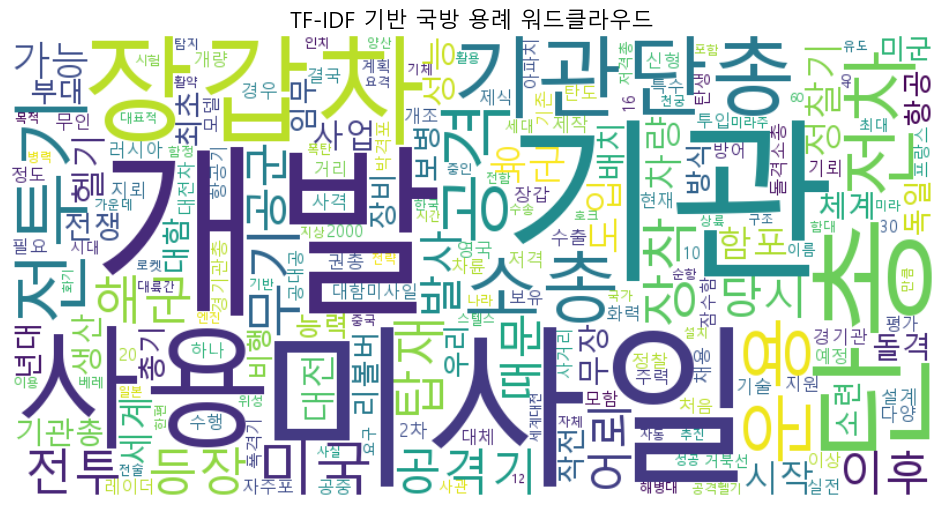

In [10]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Kkma
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 1. 형태소 분석기 설정
kkma = Kkma()

def extract_nouns(text):
    nouns = kkma.nouns(text)
    return ' '.join(nouns)

# 2. 무기.json 파일 불러오기
with open('무기.json', encoding='utf-8') as f:
    data = json.load(f)

# 3. 용례 리스트 추출 및 형태소 분석
examples = []
for entry in data:
    examples.extend(entry['용례리스트'])  # 리스트 펼치기

# 4. 형태소 분석 후 텍스트 전처리
processed_docs = [extract_nouns(text) for text in examples]

# 5. TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_docs)

# 6. TF-IDF 결과에서 단어별 평균값 계산 (전체 문서 기준 중요도)
mean_tfidf = tfidf_matrix.mean(axis=0).A1
vocab = vectorizer.get_feature_names_out()
tfidf_scores = dict(zip(vocab, mean_tfidf))

# 7. 한글 폰트 설정 (Windows: 맑은 고딕 사용)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 또는 "gulim.ttc", "NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 8. 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(tfidf_scores)

# 9. 시각화 출력
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("TF-IDF 기반 국방 용례 워드클라우드", fontsize=16)
plt.show()


In [25]:
import json

# 1. 무기.json 파일 로드
with open('무기.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 2. Kiwi 초기화
kiwi = Kiwi()

# 3. 각 용어에 대해 형태소 분석을 실행하고, 사용자 사전에 추가하기
for item in data:
    term = item['용어']
    category = item['분야']
    sub_category = item['세부항목']
    definition = item['정의']
    source = item['출처']
    examples = item['용례리스트']
    example_sources = item['용례출처리스트']

    # 4. 용어를 사용자 사전에 하나씩 추가
    kiwi.add_user_word(term, tag='NNP')  # 고유명사로 등록

    # 5. 형태소 분석 실행
    result = kiwi.analyze(term)
    
    # 형태소 분석 결과 출력
    print("형태소 분석 결과:")
    for word, tag in result:
        print(f"({word}, {tag})")
    
    print("="*50)  # 구분선


형태소 분석 결과:
([Token(form='45형 데어링급 구축함', tag='NNP', start=0, len=12)], -12.459455490112305)
형태소 분석 결과:
([Token(form='5세대 전투기', tag='NNP', start=0, len=7)], -12.459455490112305)
형태소 분석 결과:
([Token(form='5호 전차 판터', tag='NNP', start=0, len=8)], -12.459455490112305)
형태소 분석 결과:
([Token(form='99식 소총', tag='NNP', start=0, len=6)], -12.459455490112305)
형태소 분석 결과:
([Token(form='A-10', tag='NNP', start=0, len=4)], -12.459455490112305)
형태소 분석 결과:
([Token(form='A-4 스카이호크 공격기', tag='NNP', start=0, len=13)], -12.459455490112305)
형태소 분석 결과:
([Token(form='A-6 인트루더', tag='NNP', start=0, len=8)], -12.459455490112305)
형태소 분석 결과:
([Token(form='AC-130 건십', tag='NNP', start=0, len=9)], -12.459455490112305)
형태소 분석 결과:
([Token(form='AGM-86', tag='NNP', start=0, len=6)], -12.459455490112305)
형태소 분석 결과:
([Token(form='AH-1Z 바이퍼', tag='NNP', start=0, len=9)], -12.459455490112305)
형태소 분석 결과:
([Token(form='AIR-2 지니', tag='NNP', start=0, len=8)], -12.459455490112305)
형태소 분석 결과:
([Token(form='AK', tag='SL', start=0, l

In [31]:
import json
from kiwipiepy import Kiwi

# 1. Kiwi 초기화
kiwi = Kiwi()

sentence = "대한민국의 흑표 전차는 T-50 전차와 함께 우수한 열차포의 성능을 가지고 있습니다."
result = kiwi.analyze(sentence)
print(result)

[([Token(form='대한민국', tag='NNP', start=0, len=4), Token(form='의', tag='JKG', start=4, len=1), Token(form='흑표', tag='NNP', start=6, len=2), Token(form='전차', tag='NNG', start=9, len=2), Token(form='는', tag='JX', start=11, len=1), Token(form='T', tag='SL', start=13, len=1), Token(form='-', tag='SO', start=14, len=1), Token(form='50', tag='SN', start=15, len=2), Token(form='전차', tag='NNG', start=18, len=2), Token(form='와', tag='JKB', start=20, len=1), Token(form='함께', tag='MAG', start=22, len=2), Token(form='우수', tag='NNG', start=25, len=2), Token(form='하', tag='XSA', start=27, len=1), Token(form='ᆫ', tag='ETM', start=27, len=1), Token(form='열차포', tag='NNP', start=29, len=3), Token(form='의', tag='JKG', start=32, len=1), Token(form='성능', tag='NNG', start=34, len=2), Token(form='을', tag='JKO', start=36, len=1), Token(form='가지', tag='VV', start=38, len=2), Token(form='고', tag='EC', start=40, len=1), Token(form='있', tag='VX', start=42, len=1), Token(form='습니다', tag='EF', start=43, len=3), Toke

In [33]:
# 2. 무기.json 로드
with open('무기.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 3. 사용자 단어 리스트로 변환 (모든 용어를 고유명사 NNP로 등록)
custom_words = [(item["용어"], "NNP") for item in data]

# 4. 사용자 사전에 등록
for word, tag in custom_words:
    try:
        kiwi.add_user_word(word, tag)
    except Exception as e:
        print(f"단어 추가 실패: {word} -> {e}")

# 5. 확인용 분석 예시
sentence = "대한민국의 흑표 전차는 T-50 전차와 함께 우수한 열차포의 성능을 가지고 있습니다."
result = kiwi.analyze(sentence)

# 6. 형태소 분석 결과 출력
print("형태소 분석 결과:")
for token in result[0][0]:
    print(f"{token.form} ({token.tag})")

형태소 분석 결과:
대한민국 (NNP)
의 (JKG)
흑표 (NNP)
전차 (NNG)
는 (JX)
T-50 (NNP)
전 (MM)
차 (NNG)
와 (JKB)
함께 (MAG)
우수 (NNG)
하 (XSA)
ᆫ (ETM)
열차포 (NNP)
의 (JKG)
성능 (NNG)
을 (JKO)
가지 (VV)
고 (EC)
있 (VX)
습니다 (EF)
. (SF)
